In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('/content/drive/MyDrive/iPynb/ACM/Final/workout2.csv')
df = df.drop(['Unnamed: 0', 'User ID'], axis=1)
df.head()

,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,...,target,Workout Type_Cardio,Workout Type_Cycling,Workout Type_HIIT,Workout Type_Running,Workout Type_Strength,Workout Type_Yoga,Gender_Female,Gender_Male,Gender_Other
0,0.004140,0.018577,0.010509,0.008386,0.040762,0.011889,0.939445,0.001533,2,0.000870,...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.009336,0.040715,0.029045,0.018931,0.158712,0.043568,0.731580,0.000285,2,0.002230,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.001302,0.009373,0.003437,0.001406,0.028119,0.006926,0.984066,0.000379,2,0.000510,...,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.003924,0.010791,0.006236,0.002733,0.047088,0.008268,0.988152,0.000459,1,0.000406,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.003145,0.011512,0.003501,0.003323,0.024330,0.010088,0.980213,0.000188,1,0.000433,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10000 non-null  float64
 1   Height (cm)               10000 non-null  float64
 2   Weight (kg)               10000 non-null  float64
 3   Workout Duration (mins)   10000 non-null  float64
 4   Calories Burned           10000 non-null  float64
 5   Heart Rate (bpm)          10000 non-null  float64
 6   Steps Taken               10000 non-null  float64
 7   Distance (km)             10000 non-null  float64
 8   Workout Intensity         10000 non-null  int64  
 9   Sleep Hours               10000 non-null  float64
 10  Water Intake (liters)     10000 non-null  float64
 11  Daily Calories Intake     10000 non-null  float64
 12  Resting Heart Rate (bpm)  10000 non-null  float64
 13  VO2 Max                   10000 non-null  float64
 14  Body Fa

I have considered only some columns which i think would be usefull in making the model.

In [22]:
columns = ['Workout Duration (mins)', 'Calories Burned', 'Steps Taken', 'Daily Calories Intake', 'Workout Intensity', 'Distance (km)']

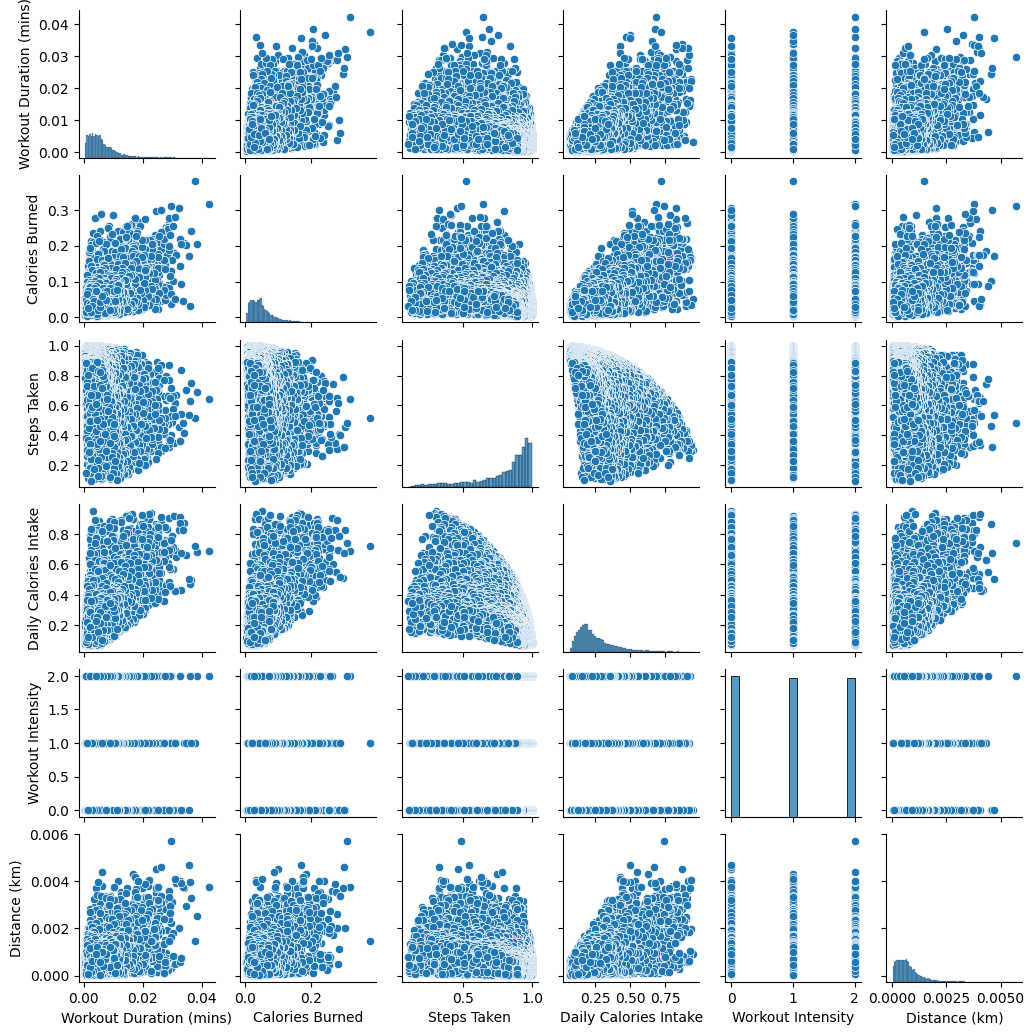

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data= df[columns], height=1.75, aspect=1)
plt.show()

In [24]:
correlation = df.corr()
needed_corr = correlation[columns].abs()
needed_corr.head()

,Workout Duration (mins),Calories Burned,Steps Taken,Daily Calories Intake,Workout Intensity,Distance (km)
Age,0.583296,0.587494,0.424843,0.701722,0.020472,0.530362
Height (cm),0.690913,0.692217,0.507837,0.839281,0.014214,0.641116
Weight (kg),0.621783,0.612278,0.468208,0.765719,0.011494,0.590489
Workout Duration (mins),1.000000,0.493116,0.366384,0.603062,0.010150,0.456669
Calories Burned,0.493116,1.000000,0.367931,0.609567,0.015980,0.463735


In [25]:
selected = set()

for column in columns:
  features = needed_corr[column].sort_values(ascending=False)
  for feature_name in features.head(3).index.tolist():
    selected.add(feature_name)

selected = list(selected)

In [26]:
selected

['Body Fat (%)',
 'Water Intake (liters)',
 'Calories Burned',
 'Workout Intensity',
 'Workout Duration (mins)',
 'VO2 Max',
 'Age',
 'Heart Rate (bpm)',
 'Steps Taken',
 'Distance (km)',
 'Daily Calories Intake']

We have decided that 6 features will be our primary columns and based on them we will decide if the person is lazy, etc. For additional info i have selected some more usefull features based on their correlation.

In [29]:
X = df[selected]
X.shape

(10000, 11)

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=8)

result = kmeans.fit_transform(X)

In [48]:
kmeans.cluster_centers_

array([[2.68704898e-03, 1.79136598e-04, 5.20373867e-02, 7.06101844e-14,
        6.11930632e-03, 3.62044494e-03, 3.59890957e-03, 1.21726692e-02,
        7.87595992e-01, 7.39550522e-04, 2.55730061e-01],
       [2.74581426e-03, 1.83054284e-04, 5.35623741e-02, 2.00000000e+00,
        6.23662016e-03, 3.69962342e-03, 3.71421518e-03, 1.25243444e-02,
        7.79525335e-01, 7.49595296e-04, 2.62657628e-01],
       [2.73323890e-03, 1.82215927e-04, 5.25963791e-02, 1.00000000e+00,
        6.25067766e-03, 3.68267978e-03, 3.67687634e-03, 1.24236328e-02,
        7.79402568e-01, 7.49165319e-04, 2.62792688e-01]])

In [50]:
from sklearn.metrics import silhouette_score

print('The silhouette score: ' ,silhouette_score(X, labels=kmeans.labels_))

The silhouette score:  0.7215365045297915


In [54]:
centers = kmeans.cluster_centers_
centers.shape

(3, 11)

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
center_pca = pca.transform(centers)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/tmp/ipython-input-3797079706.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


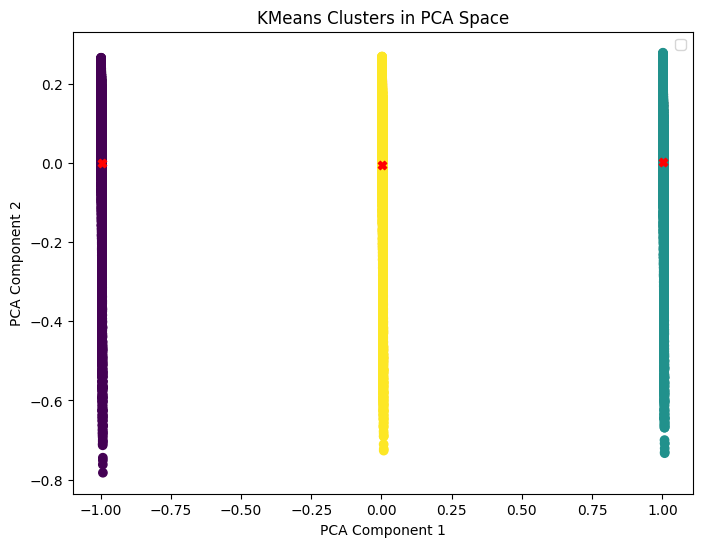

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
center_pca = pca.transform(centers)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.scatter(center_pca[:, 0], center_pca[:, 1], c='red', marker='X')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters in PCA Space')
plt.legend()
plt.show()
